In [3]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from config import (api_key, gkey)
from pprint import pprint
from datetime import datetime


In [108]:
filename="Covid19_popu.csv"
covid_df=pd.read_csv(filename)
covid_df



,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712,640733.2562,0.44
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139,28195.68869,14.31
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779,2315206.619,1.12
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654,452.0699393,14.36
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412,430.6744232,10.37
...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,VIR,United States Virgin Islands,NaN,1,0,0,18.3358,-64.8963,107016,362.5222542,9.34
252,197,URY,Uruguay,NaN,4,0,0,-32.5228,-55.7658,3494819,174772.9719,1.14
253,254,UZB,Uzbekistan,NaN,1,0,0,41.3775,64.5853,31767437,428650.2341,0.03
254,255,VEN,Venezuela (Bolivarian Republic of),NaN,10,0,0,6.4238,-66.5897,33116328,905593.4328,0.3


In [109]:
covid_df["Latitude"]=pd.to_numeric(covid_df["Latitude"],errors='coerce')
covid_df["Longitude"]=pd.to_numeric(covid_df["Longitude"],errors='coerce')

In [110]:
# drop duplicated cities in coordinates_df dataframe 
#and define new columns in the dataframe for temp,cloudness, wind speed and humidity
covid_df.loc[0,"Max Temp (F)"]=""
covid_df.loc[0,"Humidity (%)"]=""
covid_df.loc[0,"Cloudiness (%)"]=""
covid_df.loc[0,"Wind Speed (m/s)"]=""

covid_df.head()


,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s)
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712,640733.2562,0.44,,,,
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139,28195.68869,14.31,NaN,NaN,NaN,NaN
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779,2315206.619,1.12,NaN,NaN,NaN,NaN
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654,452.0699393,14.36,NaN,NaN,NaN,NaN
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412,430.6744232,10.37,NaN,NaN,NaN,NaN


In [111]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#api.openweathermap.org/data/2.5/weather?lat=35&lon=139


In [112]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}"

# Loop through the list of cities and perform a request for data on each

with open("Temp_retrieve.log", 'w') as f:
    for j in range(0,len(covid_df.Latitude)):
        quary_url=f"{query_url}&lat={covid_df.iloc[j,7]}&lon={covid_df.iloc[j,8]}"
        response = requests.get(quary_url).json()
        pprint(response)
        try:
        
            covid_df.iloc[j,12]=response["main"]["temp_max"]
            covid_df.iloc[j,13]=response["main"]["humidity"]
            covid_df.iloc[j,14]=response["clouds"]["all"]
            covid_df.iloc[j,15]=response["wind"]["speed"]
            print(f"City ID: {response['id']} been processed.", file = f)
        
        
        except KeyError:
            print(f" City {covid_df.iloc[j,3]} {covid_df.iloc[j,2]} : weather data not found", file = f)
   

    
    
    

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 33.94, 'lon': 67.71},
 'dt': 1584508855,
 'id': 1132172,
 'main': {'feels_like': 22.48,
          'grnd_level': 692,
          'humidity': 89,
          'pressure': 1025,
          'sea_level': 1025,
          'temp': 28.31,
          'temp_max': 28.31,
          'temp_min': 28.31},
 'name': 'Ōkak',
 'sys': {'country': 'AF', 'sunrise': 1584495327, 'sunset': 1584538735},
 'timezone': 16200,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 315, 'speed': 2.51}}
{'base': 'stations',
 'clouds': {'all': 39},
 'cod': 200,
 'coord': {'lat': 41.15, 'lon': 20.17},
 'dt': 1584508855,
 'id': 783263,
 'main': {'feels_like': 33.12,
          'humidity': 93,
          'pressure': 1026,
          'temp': 37.4,
          'temp_max': 37.4,
          'temp_min': 37.4},
 'name': 'Elbasan',
 'sys': {'country': 'AL',
         'id': 6359,


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -37.81, 'lon': 144.96},
 'dt': 1584508804,
 'id': 2158177,
 'main': {'feels_like': 69.48,
          'humidity': 34,
          'pressure': 1019,
          'temp': 80.49,
          'temp_max': 82.99,
          'temp_min': 77},
 'name': 'Melbourne',
 'sys': {'country': 'AU',
         'id': 9554,
         'sunrise': 1584476470,
         'sunset': 1584520520,
         'type': 1},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'gust': 31.09, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -31.95, 'lon': 115.86},
 'dt': 1584508682,
 'id': 2066756,
 'main': {'feels_like': 64.36,
          'humidity': 43,
          'pressure': 1019,
          'temp': 71.94,
          'temp_max': 73,
          'temp_min': 70},
 'name': 'Maylan

{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 42.73, 'lon': 25.49},
 'dt': 1584508859,
 'id': 727291,
 'main': {'feels_like': 26.89,
          'humidity': 100,
          'pressure': 1027,
          'temp': 31.21,
          'temp_max': 37.99,
          'temp_min': 24.8},
 'name': 'Shipka',
 'sys': {'country': 'BG',
         'id': 6361,
         'sunrise': 1584505467,
         'sunset': 1584548857,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 1.12}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 12.24, 'lon': -1.56},
 'dt': 1584508859,
 'id': 2359923,
 'main': {'feels_like': 86.86,
          'humidity': 43,
          'pressure': 1008,
          'temp': 87.8,
          'temp_max': 87.8,
          'temp_min': 87.8},
 'name': 'Kadiogo Province',
 'sys'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 6.61, 'lon': 20.94},
 'dt': 1584508861,
 'id': 239880,
 'main': {'feels_like': 76.42,
          'grnd_level': 941,
          'humidity': 36,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 79.07,
          'temp_max': 79.07,
          'temp_min': 79.07},
 'name': 'Central African Republic',
 'sys': {'country': 'CF', 'sunrise': 1584506475, 'sunset': 1584550032},
 'timezone': 3600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 179, 'speed': 4.74}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -35.68, 'lon': -71.54},
 'dt': 1584508861,
 'id': 3872306,
 'main': {'feels_like': 45.14,
          'grnd_level': 993,
          'humidity': 87,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 49.01,
          'temp_max': 49.01,
        

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.98, 'lon': 112.27},
 'dt': 1584508863,
 'id': 7656068,
 'main': {'feels_like': 70.11,
          'grnd_level': 1007,
          'humidity': 39,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 75.83,
          'temp_max': 75.83,
          'temp_min': 75.83},
 'name': 'Baimiao',
 'sys': {'country': 'CN', 'sunrise': 1584484635, 'sunset': 1584528043},
 'timezone': 28800,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 199, 'speed': 9.86}}
{'base': 'stations',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': 27.61, 'lon': 111.71},
 'dt': 1584508864,
 'id': 1804451,
 'main': {'feels_like': 62.53,
          'grnd_level': 966,
          'humidity': 65,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 64.49,
          'temp_max': 64.49,
          'temp_min': 64.49},

{'base': 'stations',
 'clouds': {'all': 16},
 'cod': 200,
 'coord': {'lat': 30.62, 'lon': 102.71},
 'dt': 1584508866,
 'id': 1794299,
 'main': {'feels_like': 30.56,
          'grnd_level': 673,
          'humidity': 56,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 39.29,
          'temp_max': 39.29,
          'temp_min': 39.29},
 'name': 'Sichuan',
 'sys': {'country': 'CN', 'sunrise': 1584486927, 'sunset': 1584530339},
 'timezone': 28800,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 106, 'speed': 7.52}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.31, 'lon': 117.32},
 'dt': 1584508866,
 'id': 1806619,
 'main': {'feels_like': 62.47,
          'humidity': 8,
          'pressure': 999,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Huozhuangzi',
 'sys': {'country': 'CN',
         'id': 96

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 21.52, 'lon': -77.78},
 'dt': 1584508868,
 'id': 3754913,
 'main': {'feels_like': 71.91,
          'humidity': 94,
          'pressure': 1021,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'El Próximo',
 'sys': {'country': 'CU',
         'id': 7230,
         'sunrise': 1584530192,
         'sunset': 1584573691,
         'type': 1},
 'timezone': -14400,
 'visibility': 9000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 40, 'speed': 8.05}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 12.17, 'lon': -68.99},
 'dt': 1584508868,
 'id': 7626836,
 'main': {'feels_like': 79.9,
          'humidity': 74,
          'pressure': 1015,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Curaçao',
 'sys': {'country': 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.23, 'lon': 2.21},
 'dt': 1584508870,
 'id': 3015436,
 'main': {'feels_like': 40.98,
          'humidity': 82,
          'pressure': 1029,
          'temp': 44.01,
          'temp_max': 44.01,
          'temp_min': 44.01},
 'name': 'Gouzon',
 'sys': {'country': 'FR',
         'id': 2011615,
         'sunrise': 1584511053,
         'sunset': 1584554443,
         'type': 3},
 'timezone': 3600,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 161, 'speed': 1.03}}
{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 200,
 'coord': {'lat': 3.93, 'lon': -53.13},
 'dt': 1584508870,
 'id': 6690606,
 'main': {'feels_like': 77.25,
          'grnd_level': 992,
          'humidity': 99,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 70.43,
          'temp_max': 70.43,
          'temp_min': 70.43},
 

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 9.95, 'lon': -9.7},
 'dt': 1584508872,
 'id': 2414659,
 'main': {'feels_like': 78.06,
          'grnd_level': 962,
          'humidity': 80,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 74.39,
          'temp_max': 74.39,
          'temp_min': 74.39},
 'name': 'Tokonou',
 'sys': {'country': 'GN', 'sunrise': 1584513835, 'sunset': 1584557376},
 'timezone': 0,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 242, 'speed': 5.14}}
{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': 4.86, 'lon': -58.93},
 'dt': 1584508872,
 'id': 3378535,
 'main': {'feels_like': 76.77,
          'grnd_level': 990,
          'humidity': 98,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 70.79,
          'temp_max': 70.79,
          'temp_min': 70.79},

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 36.2, 'lon': 138.25},
 'dt': 1584508874,
 'id': 1851497,
 'main': {'feels_like': 47.23,
          'humidity': 26,
          'pressure': 1011,
          'temp': 55.4,
          'temp_max': 60.01,
          'temp_min': 52},
 'name': 'Suguri',
 'sys': {'country': 'JP',
         'id': 7952,
         'sunrise': 1584478420,
         'sunset': 1584521790,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': 49.19, 'lon': -2.11},
 'dt': 1584508874,
 'id': 3042091,
 'main': {'feels_like': 36.75,
          'humidity': 81,
          'pressure': 1028,
          'temp': 43.29,
          'temp_max': 46.4,
          'temp_min': 36},
 'name': 'Saint Helier',
 'sys': {'country'

{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord': {'lat': 3.2, 'lon': 73.22},
 'dt': 1584508876,
 'id': 1282028,
 'main': {'feels_like': 87.55,
          'grnd_level': 1012,
          'humidity': 79,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 84.47,
          'temp_max': 84.47,
          'temp_min': 84.47},
 'name': 'Maldives',
 'rain': {'3h': 0.56},
 'sys': {'country': 'MV', 'sunrise': 1584493921, 'sunset': 1584537497},
 'timezone': 18000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 97, 'speed': 15.3}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 35.94, 'lon': 14.38},
 'dt': 1584508876,
 'id': 2562744,
 'main': {'feels_like': 48.11,
          'humidity': 66,
          'pressure': 1025,
          'temp': 53.19,
          'temp_max': 54,
          'temp_min': 52},
 'name': 'Mellieħa',
 'sys': {'country': 'M

{'base': 'stations',
 'clouds': {'all': 27},
 'cod': 200,
 'coord': {'lat': 60.47, 'lon': 8.47},
 'dt': 1584508878,
 'id': 3162771,
 'main': {'feels_like': 21.36,
          'humidity': 83,
          'pressure': 998,
          'temp': 28.99,
          'temp_max': 28.99,
          'temp_min': 28.99},
 'name': 'Åsberg',
 'snow': {'3h': 0.56},
 'sys': {'country': 'NO',
         'id': 18975,
         'sunrise': 1584509571,
         'sunset': 1584552921,
         'type': 3},
 'timezone': 3600,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 217, 'speed': 5.5}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 21.47, 'lon': 55.98},
 'dt': 1584508878,
 'id': 289212,
 'main': {'feels_like': 75.34,
          'grnd_level': 1009,
          'humidity': 50,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 78.71,
          'temp_max': 78.71,
          't

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': 45.94, 'lon': 24.97},
 'dt': 1584508880,
 'id': 666600,
 'main': {'feels_like': 30.2,
          'humidity': 60,
          'pressure': 1029,
          'temp': 37,
          'temp_max': 37,
          'temp_min': 37},
 'name': 'Şoarş',
 'sys': {'country': 'RO',
         'id': 50398,
         'sunrise': 1584505597,
         'sunset': 1584548976,
         'type': 3},
 'timezone': 7200,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 4}}
{'base': 'stations',
 'clouds': {'all': 43},
 'cod': 200,
 'coord': {'lat': 61.52, 'lon': 105.32},
 'dt': 1584508881,
 'id': 2012956,
 'main': {'feels_like': 1.63,
          'grnd_level': 962,
          'humidity': 83,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 12.65,
          'temp_max': 12.65,
          'temp_min': 12.65},
 'name':

{'base': 'stations',
 'clouds': {'all': 50},
 'cod': 200,
 'coord': {'lat': 46.15, 'lon': 15},
 'dt': 1584508882,
 'id': 3186906,
 'main': {'feels_like': 38.39,
          'humidity': 75,
          'pressure': 1030,
          'temp': 42.71,
          'temp_max': 46.99,
          'temp_min': 39.99},
 'name': 'Zagorje ob Savi',
 'sys': {'country': 'SI',
         'id': 6816,
         'sunrise': 1584507987,
         'sunset': 1584551370,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -30.56, 'lon': 22.94},
 'dt': 1584508883,
 'id': 1015612,
 'main': {'feels_like': 63.07,
          'grnd_level': 891,
          'humidity': 66,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 69.35,
          'temp_max': 69.

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 33.89, 'lon': 9.54},
 'dt': 1584508884,
 'id': 2468365,
 'main': {'feels_like': 49.75,
          'humidity': 82,
          'pressure': 1021,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Gouvernorat de Gabès',
 'sys': {'country': 'TN',
         'id': 1199,
         'sunrise': 1584509274,
         'sunset': 1584552704,
         'type': 1},
 'timezone': 3600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 18.34}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 38.96, 'lon': 35.24},
 'dt': 1584508885,
 'id': 320946,
 'main': {'feels_like': 19.45,
          'humidity': 92,
          'pressure': 1014,
          'temp': 24.8,
          'temp_max': 24.8,
          'temp_min': 24.8},
 'name': 'Boğazlıyan',
 'sys': {'country': 'TR',
   

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 38.9, 'lon': -77.03},
 'dt': 1584508887,
 'id': 4140963,
 'main': {'feels_like': 41.88,
          'humidity': 57,
          'pressure': 1027,
          'temp': 47.89,
          'temp_max': 52,
          'temp_min': 44.01},
 'name': 'Washington D.C.',
 'sys': {'country': 'US',
         'id': 3614,
         'sunrise': 1584530038,
         'sunset': 1584573485,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 27.77, 'lon': -81.69},
 'dt': 1584508887,
 'id': 4155988,
 'main': {'feels_like': 72.32,
          'humidity': 88,
          'pressure': 1024,
          'temp': 69.42,
          'temp_max': 72,
          'temp_min': 66.99},
 'name': 'Fort Meade',
 'sys': {'c

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 42.23, 'lon': -71.53},
 'dt': 1584508889,
 'id': 4939881,
 'main': {'feels_like': 25.32,
          'humidity': 55,
          'pressure': 1022,
          'temp': 37.81,
          'temp_max': 43,
          'temp_min': 32},
 'name': 'Hopkinton',
 'sys': {'country': 'US',
         'id': 5231,
         'sunrise': 1584528723,
         'sunset': 1584572161,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 290, 'gust': 26.4, 'speed': 13.87}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.33, 'lon': -84.54},
 'dt': 1584508889,
 'id': 4997346,
 'main': {'feels_like': 23.76,
          'humidity': 74,
          'pressure': 1027,
          'temp': 30.43,
          'temp_max': 33.01,
          'temp_min': 28},
 'name': 'Ithaca',
 'sys': 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.53, 'lon': -99.78},
 'dt': 1584508891,
 'id': 5062441,
 'main': {'feels_like': 22.75,
          'humidity': 86,
          'pressure': 1015,
          'temp': 32,
          'temp_max': 32,
          'temp_min': 32},
 'name': 'Wells',
 'sys': {'country': 'US',
         'id': 3019,
         'sunrise': 1584535498,
         'sunset': 1584578943,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 9.17}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.39, 'lon': -82.76},
 'dt': 1584508891,
 'id': 5149595,
 'main': {'feels_like': 25.2,
          'humidity': 83,
          'pressure': 1027,
          'temp': 32.31,
          'temp_max': 34,
          'temp_min': 30},
 'name': 'Centerburg',
 'sys': {'country': 'U

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 38.49, 'lon': -80.95},
 'dt': 1584508893,
 'id': 4802333,
 'main': {'feels_like': 41.67,
          'humidity': 93,
          'pressure': 1027,
          'temp': 44.38,
          'temp_max': 45,
          'temp_min': 44.01},
 'name': 'Clay',
 'sys': {'country': 'US',
         'id': 3707,
         'sunrise': 1584530977,
         'sunset': 1584574427,
         'type': 1},
 'timezone': -14400,
 'visibility': 9656,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'},
             {'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 67, 'speed': 1.79}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.27, 'lon': -89.62},
 'dt': 1584508893,
 'id': 5259304,
 'main': {'feels_like': 27.79,
          'humidity': 66,
          'pressure': 1023,
          'temp': 35.64,
          'temp_max': 39.99,
          'temp_min': 30.99},
 'name': 'L

In [256]:
check=covid_df[covid_df["Max Temp (F)"].isnull()]
check.head(30)
covid_df.head()
covid_df.to_csv("covid_df.csv")

In [114]:
#convert string datatype to numeric for the following columns
covid_df["Max Temp (F)"]=pd.to_numeric(covid_df["Max Temp (F)"],errors='coerce')
covid_df["Humidity (%)"]=pd.to_numeric(covid_df["Humidity (%)"],errors='coerce')
covid_df["Cloudiness (%)"]=pd.to_numeric(covid_df["Cloudiness (%)"],errors='coerce')
covid_df["Wind Speed (m/s)"]=pd.to_numeric(covid_df["Wind Speed (m/s)"],errors='coerce')
covid_df["risk_Permillion"]=pd.to_numeric(covid_df["risk_Permillion"],errors='coerce')
covid_df["population"]=pd.to_numeric(covid_df["population"],errors='coerce')
covid_df["land"]=pd.to_numeric(covid_df["land"],errors='coerce')
print(covid_df.dtypes)
covid_df.head() 

LOC_id                int64
ISOALPHA             object
COUNTRYNM            object
NAME1                object
Confirmed             int64
Deaths                int64
Recovered             int64
Latitude            float64
Longitude           float64
population          float64
land                float64
risk_Permillion     float64
Max Temp (F)        float64
Humidity (%)          int64
Cloudiness (%)        int64
Wind Speed (m/s)    float64
dtype: object


,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s)
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712.0,6.407333e+05,0.44,28.31,89,0,2.51
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139.0,2.819569e+04,14.31,37.40,93,39,2.24
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779.0,2.315207e+06,1.12,64.31,31,0,14.12
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654.0,4.520699e+02,14.36,48.99,89,45,4.90
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412.0,4.306744e+02,10.37,77.00,73,40,6.93


In [115]:
covid_df.describe()


,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s)
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,2.530000e+02,2.530000e+02,253.000000,256.000000,256.000000,256.000000,256.000000
mean,128.500000,654.093750,25.156250,297.007812,27.485944,4.760327,2.823490e+07,4.270343e+05,44.265138,57.241016,70.378906,45.761719,8.015352
std,74.045031,4644.570432,227.984896,3408.079206,22.842008,81.454055,9.435456e+07,1.241287e+06,228.773705,20.254697,24.225594,37.774276,5.860046
min,1.000000,0.000000,0.000000,0.000000,-41.454500,-157.498300,8.040000e+02,5.287310e-01,0.000000,-14.800000,5.000000,0.000000,0.490000
25%,64.750000,4.000000,0.000000,0.000000,15.060375,-72.953825,1.826156e+06,2.819569e+04,1.520000,42.800000,56.000000,6.250000,3.360000
50%,128.500000,27.000000,0.000000,0.000000,33.913000,10.225750,6.745354e+06,1.388882e+05,6.200000,59.000000,76.500000,40.000000,6.930000
75%,192.250000,120.500000,1.000000,5.250000,42.898650,70.314000,2.752307e+07,3.535649e+05,16.060000,73.547500,90.000000,90.000000,10.330000
max,256.000000,67794.000000,3085.000000,54288.000000,64.963100,174.886000,1.388858e+09,1.627888e+07,3110.280000,102.990000,100.000000,100.000000,33.330000


In [116]:
covid_df["temp_gp"]=""
for j in range(0,len(covid_df["Max Temp (F)"])):
    if covid_df.iloc[j,12]>-1000 and covid_df.iloc[j,12]<43:
        covid_df.iloc[j,16]="L Temp"
    elif covid_df.iloc[j,12]>=43 and covid_df.iloc[j,12]<72:
        covid_df.iloc[j,16]="M Temp"
    elif covid_df.iloc[j,12]>=72 and covid_df.iloc[j,12]<1000:
        covid_df.iloc[j,16]="H Temp"   
    


covid_df.head()  

,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s),temp_gp
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712.0,6.407333e+05,0.44,28.31,89,0,2.51,L Temp
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139.0,2.819569e+04,14.31,37.40,93,39,2.24,L Temp
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779.0,2.315207e+06,1.12,64.31,31,0,14.12,M Temp
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654.0,4.520699e+02,14.36,48.99,89,45,4.90,M Temp
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412.0,4.306744e+02,10.37,77.00,73,40,6.93,H Temp


In [117]:
# convert wind speed unit m/s to MPH
covid_df["Wind Speed (mph)"]=covid_df["Wind Speed (m/s)"]*2.23694
covid_df["Log Case"]=np.log2(covid_df["Confirmed"]+0.1)
covid_df["Trans Case"]=np.log2(covid_df["risk_Permillion"]+0.1)
covid_df["density"]=covid_df["population"]*covid_df["land"]
# covid_df.describe()
# covid_df.dropna()

# #covid_df.to_csv("output_data/covid19_temp_data.csv")

# #get current date 
# dateTimeObj = datetime.now()
# dateStr = dateTimeObj.strftime("%d %b %Y ")
#define dataset with population >3000000 and confirmed case >10

define_df= covid_df.loc[(covid_df["population"] >3000000) & (covid_df["Confirmed"] >10)]

define_df.head()

covid_df.describe()

,LOC_id,Confirmed,Deaths,Recovered,Latitude,Longitude,population,land,risk_Permillion,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s),Wind Speed (mph),Log Case,Trans Case,density
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,2.530000e+02,2.530000e+02,253.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,253.000000,2.530000e+02
mean,128.500000,654.093750,25.156250,297.007812,27.485944,4.760327,2.823490e+07,4.270343e+05,44.265138,57.241016,70.378906,45.761719,8.015352,17.929861,4.787160,2.448865,4.705480e+13
std,74.045031,4644.570432,227.984896,3408.079206,22.842008,81.454055,9.435456e+07,1.241287e+06,228.773705,20.254697,24.225594,37.774276,5.860046,13.108572,3.323822,2.747842,3.310392e+14
min,1.000000,0.000000,0.000000,0.000000,-41.454500,-157.498300,8.040000e+02,5.287310e-01,0.000000,-14.800000,5.000000,0.000000,0.490000,1.096101,-3.321928,-3.321928,4.250997e+02
25%,64.750000,4.000000,0.000000,0.000000,15.060375,-72.953825,1.826156e+06,2.819569e+04,1.520000,42.800000,56.000000,6.250000,3.360000,7.516118,2.035624,0.695994,8.628249e+10
50%,128.500000,27.000000,0.000000,0.000000,33.913000,10.225750,6.745354e+06,1.388882e+05,6.200000,59.000000,76.500000,40.000000,6.930000,15.501994,4.760221,2.655352,8.714198e+11
75%,192.250000,120.500000,1.000000,5.250000,42.898650,70.314000,2.752307e+07,3.535649e+05,16.060000,73.547500,90.000000,90.000000,10.330000,23.107590,6.913757,4.014355,7.837975e+12
max,256.000000,67794.000000,3085.000000,54288.000000,64.963100,174.886000,1.388858e+09,1.627888e+07,3110.280000,102.990000,100.000000,100.000000,33.330000,74.557210,16.048872,11.602875,4.345832e+15


In [120]:
covid_df["density_gp"]=""
for j in range(0,len(covid_df["density"])):
    if covid_df.iloc[j,20]>-1000 and covid_df.iloc[j,20]<8.628249e+10:
        covid_df.iloc[j,21]="L Density"
    elif covid_df.iloc[j,20]>=8.628249e+10 and covid_df.iloc[j,20]<7.837975e+12:
        covid_df.iloc[j,21]="M Density"
    elif covid_df.iloc[j,20]>=7.837975e+12 and covid_df.iloc[j,20]<=4.345832e+15:
        covid_df.iloc[j,21]="H Density"   
    


covid_df.head()  

,LOC_id,ISOALPHA,COUNTRYNM,NAME1,Confirmed,Deaths,Recovered,Latitude,Longitude,population,...,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (m/s),temp_gp,Wind Speed (mph),Log Case,Trans Case,density,density_gp
0,1,AFG,Afghanistan,NaN,16,0,0,33.9391,67.7100,36442712.0,...,28.31,89,0,2.51,L Temp,5.614719,4.008989,-0.888969,2.335006e+13,H Density
1,2,ALB,Albania,NaN,42,1,0,41.1533,20.1683,2935139.0,...,37.40,93,39,2.24,L Temp,5.010746,5.395748,3.848998,8.275827e+10,L Density
2,3,DZA,Algeria,NaN,48,4,12,28.0339,1.6596,43007779.0,...,64.31,31,0,14.12,M Temp,31.585593,5.587965,0.286881,9.957189e+13,H Density
3,4,AND,Andorra,NaN,1,0,1,42.5063,1.5218,69654.0,...,48.99,89,45,4.90,M Temp,10.961006,0.137504,3.853996,3.148848e+07,L Density
4,5,ATG,Antigua and Barbuda,NaN,1,0,0,17.0608,-61.7964,96412.0,...,77.00,73,40,6.93,H Temp,15.501994,0.137504,3.388190,4.152218e+07,L Density


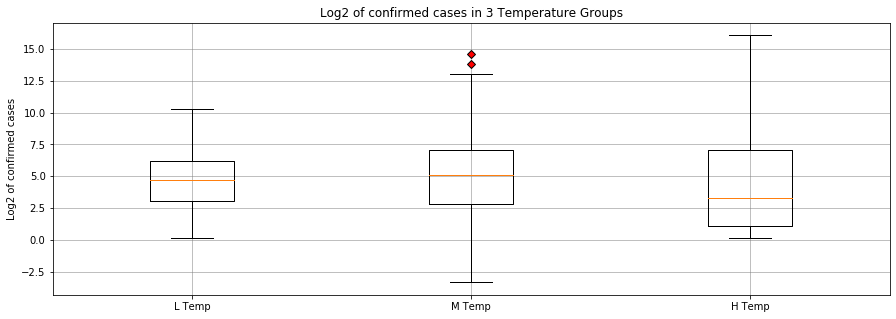

In [248]:

Temp3_gp=[]

for x in ['L Temp','M Temp','H Temp']:
     Temp3_gp.append(covid_df.loc[covid_df["temp_gp"]==x]["Log Case"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Log2 of confirmed cases in 3 Temperature Groups')
ax1.set_ylabel('Log2 of confirmed cases')
ax1.set_xticklabels(['L Temp','M Temp','H Temp'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(Temp3_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"Cases_3Temp")


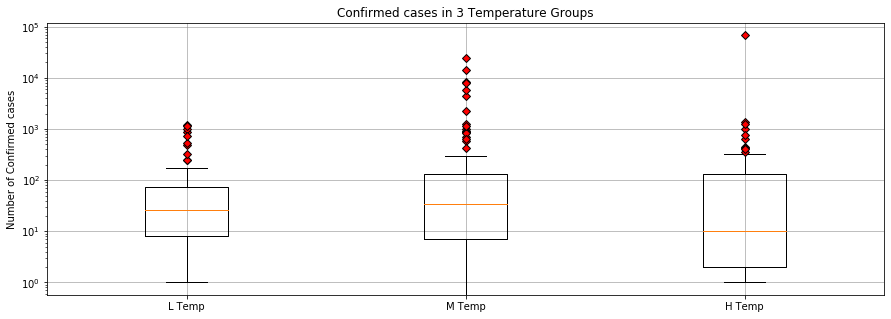

In [249]:
Temp4_gp=[]
for x in ['L Temp','M Temp','H Temp']:
     Temp4_gp.append(covid_df.loc[covid_df["temp_gp"]==x]["Confirmed"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Confirmed cases in 3 Temperature Groups')
ax1.set_ylabel('Number of Confirmed cases')
ax1.set_xticklabels(['L Temp','M Temp','H Temp'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.yscale('log')
ax1.boxplot(Temp4_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"Cases_3Temp_a")

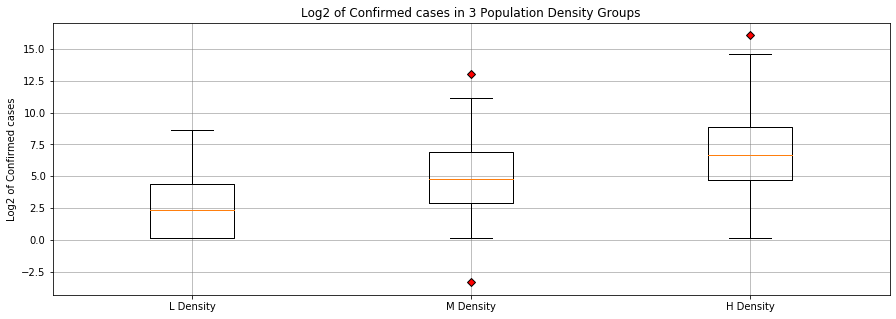

In [250]:

den3_gp=[]

for x in ['L Density','M Density','H Density']:
     den3_gp.append(covid_df.loc[covid_df["density_gp"]==x]["Log Case"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Log2 of Confirmed cases in 3 Population Density Groups')
ax1.set_ylabel('Log2 of Confirmed cases')
ax1.set_xticklabels(['L Density','M Density','H Density'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(den3_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"LogCases_3Dents")



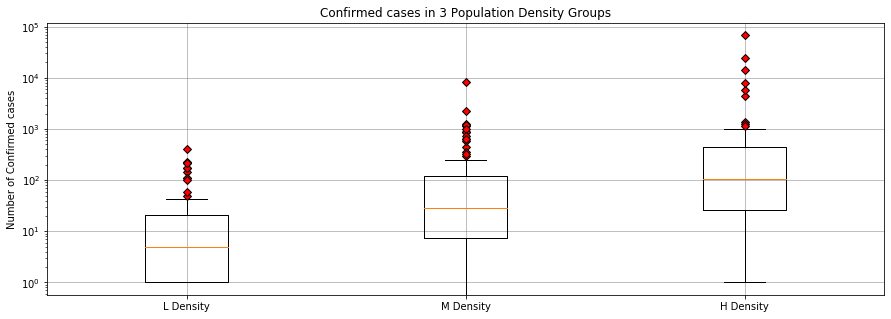

In [251]:
den4_gp=[]

for x in ['L Density','M Density','H Density']:
     den4_gp.append(covid_df.loc[covid_df["density_gp"]==x]["Confirmed"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Confirmed cases in 3 Population Density Groups')
ax1.set_ylabel('Number of Confirmed cases')
ax1.set_xticklabels(['L Density','M Density','H Density'])
plt.yscale('log')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(den4_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"Cases_3Dents")


In [103]:
gp1=covid_df[covid_df["temp_gp"]=="L Temp"]["Log Case"]
gp2=covid_df[covid_df["temp_gp"]=="M Temp"]["Log Case"]
gp3=covid_df[covid_df["temp_gp"]=="H Temp"]["Log Case"]


In [104]:
st.f_oneway(gp1,gp2,gp3)

F_onewayResult(statistic=11.187043315090973, pvalue=2.21043431680969e-05)

In [105]:
st.kruskal(gp1,gp2,gp3)

KruskalResult(statistic=20.29767896183819, pvalue=3.912145653820401e-05)

In [123]:
gp1=covid_df[covid_df["density_gp"]=="L Density"]["Log Case"]
gp2=covid_df[covid_df["density_gp"]=="M Density"]["Log Case"]
gp3=covid_df[covid_df["density_gp"]=="H Density"]["Log Case"]
st.f_oneway(gp1,gp2,gp3)

F_onewayResult(statistic=23.694997671391697, pvalue=3.773173902189276e-10)

 The R-squared : nan


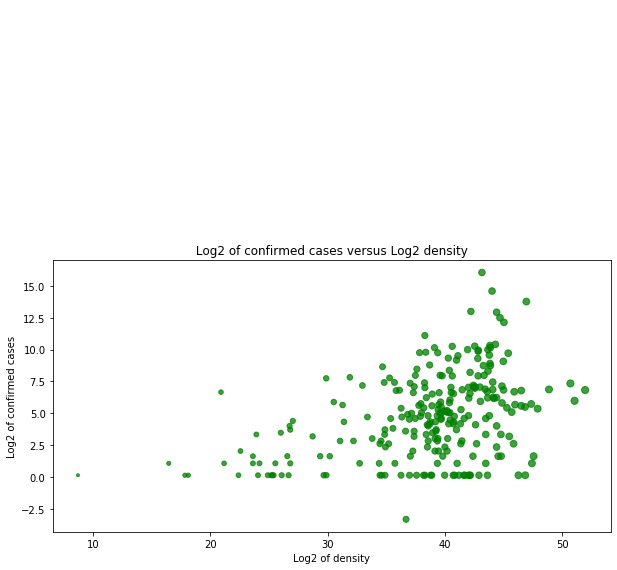

In [252]:
y_values = covid_df["Log Case"]
x_values = np.log2(covid_df["density"]+0.1)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="green",
    s=x_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(""+line_eq,(10,36),fontsize=15,color="red")
plt.ylabel("Log2 of confirmed cases")
plt.xlabel('Log2 of density')
#     plt.ylim(min(y_values)-2, max(y_values)+2)
#     plt.xlim(14, max(x_values)+1)
plt.title(" Log2 of confirmed cases versus Log2 density ")
    
print(f" The R-squared : {round(rvalue,2)}") 
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
fig1.savefig(f"log2Cases_logDents_scatter")


 The R-squared : 0.22
 The R-squared : 0.09
 The R-squared : -0.09
 The R-squared : -0.05
 The R-squared : 0.0


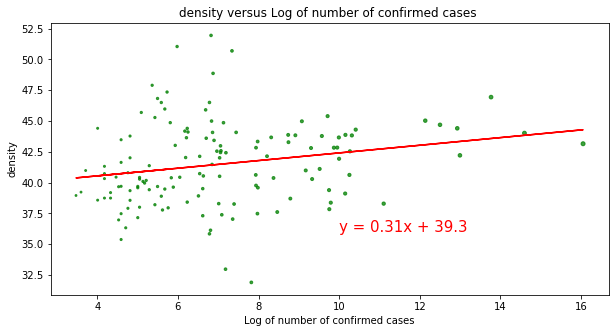

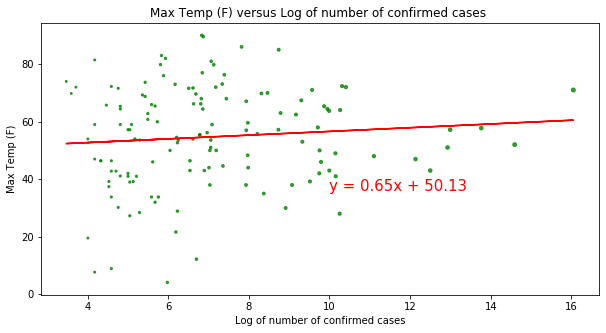

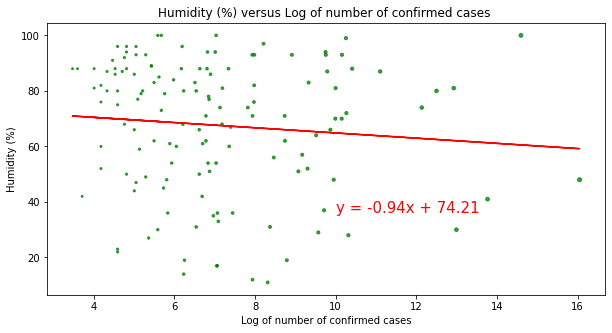

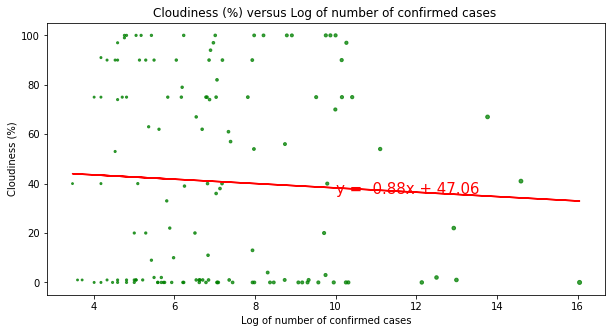

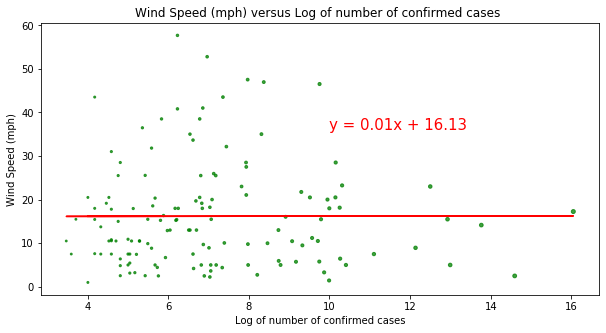

In [100]:
ce_df=define_df

#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["density","Max Temp (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]

for var in var_list:
    
#     fig1 =plt.figure(figsize=(10, 5))
#     plt.scatter(ce_df["Log Case"],ce_df[var], marker="o", facecolors="green", edgecolors="green", alpha=0.75)
#     plt.ylabel(var)
#     plt.xlabel('Log Case')
#     plt.ylim(min(ce_df[var])-15, max(ce_df[var])+15)
#     #plt.xlim(min(ce_df["Max Temp (F)])-10, max(ce_df["Max Temp (F)"])+10)
#     plt.title(f"{var} versus Log confirmed cases")
    
#     fig1.savefig(f"{var}")
# Calculate linear regression model and Add the linear regression equation and line to plot
    x_values = ce_df["Log Case"]
    y_values = ce_df[var]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize=(10, 5))
    plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="green",
          s=x_values, alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(""+line_eq,(10,36),fontsize=15,color="red")
    plt.ylabel(var)
    plt.xlabel('Log of number of confirmed cases')
#     plt.ylim(min(y_values)-2, max(y_values)+2)
#     plt.xlim(14, max(x_values)+1)
    plt.title(f"{var} versus Log of number of confirmed cases ")
    
    print(f" The R-squared : {round(rvalue,2)}")  
    
    
    

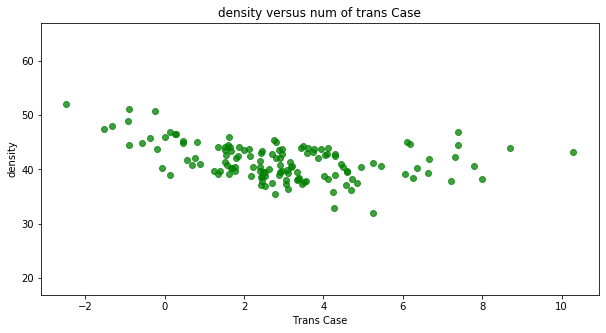

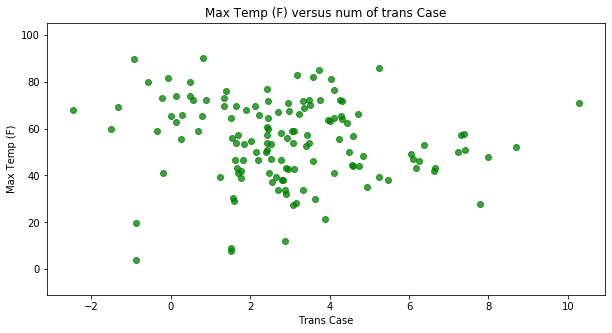

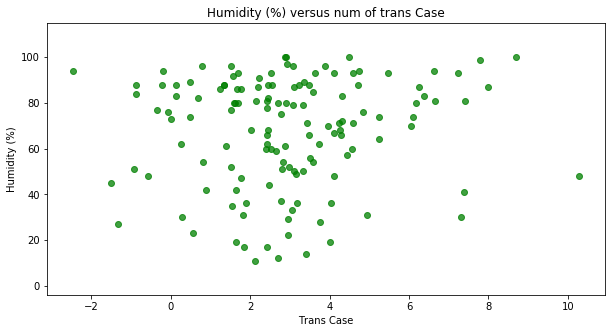

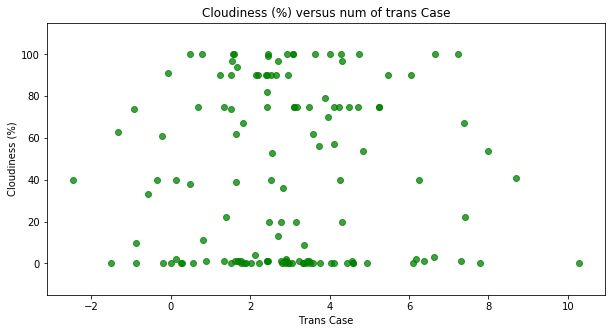

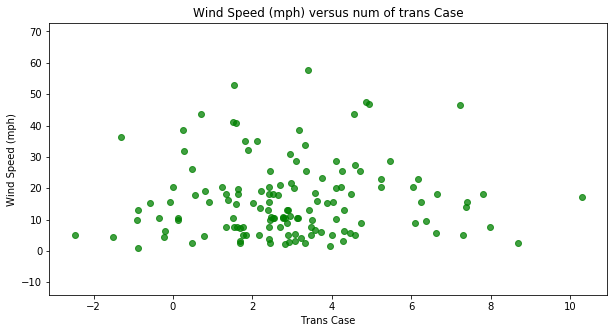

In [101]:


#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["density","Max Temp (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]

for var in var_list:
    
    fig1 =plt.figure(figsize=(10, 5))
    plt.scatter(ce_df["Trans Case"],ce_df[var], marker="o", facecolors="green", edgecolors="green", alpha=0.75)
    plt.ylabel(var)
    plt.xlabel('Trans Case')
    plt.ylim(min(ce_df[var])-15, max(ce_df[var])+15)
    #plt.xlim(min(ce_df["Max Temp (F)])-10, max(ce_df["Max Temp (F)"])+10)
    plt.title(f"{var} versus num of trans Case")
    
    fig1.savefig(f"{var}")
    

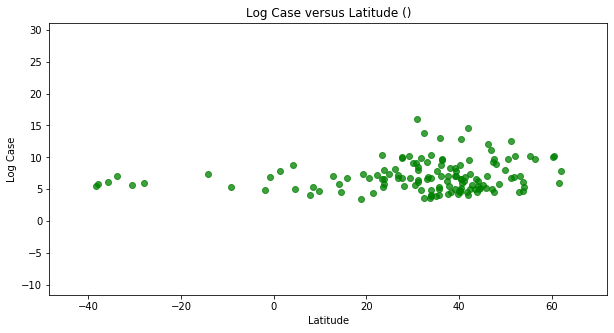

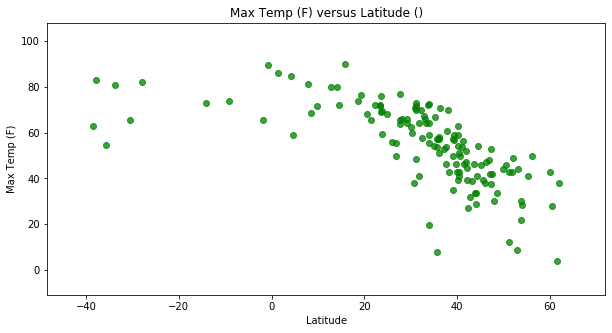

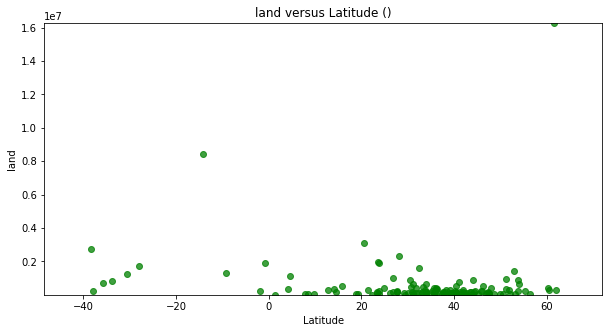

In [56]:
#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["Log Case","Max Temp (F)","land"]
for var in var_list:
    
    fig1 =plt.figure(figsize=(10, 5))
    plt.scatter(ce_df["Latitude"],ce_df[var], marker="o", facecolors="green", edgecolors="green", alpha=0.75)
    plt.ylabel(var)
    plt.xlabel('Latitude')
    plt.ylim(min(ce_df[var])-15, max(covid_df[var])+15)
    plt.xlim(min(ce_df["Latitude"])-10, max(ce_df["Latitude"])+10)
    plt.title(f"{var} versus Latitude ()")
    
    fig1.savefig(f"{var}")
    

In [141]:
#######################
##  time series data
#########################
filename2="Long_format_Timepoints.csv"
timept_df=pd.read_csv(filename2)
timept_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 12 columns):
LOC_id         3988 non-null int64
Date           3988 non-null object
Confirmed      3988 non-null int64
ISOALPHA       3988 non-null object
COUNTRYNM      3988 non-null object
NAME1          2134 non-null object
population     3988 non-null int64
land           3988 non-null float64
lag_confirm    3988 non-null object
time_point     3988 non-null int64
new_cases      3988 non-null object
log_conf       3988 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 374.0+ KB


In [140]:
loc_list=timept_df["LOC_id"].unique().tolist()

In [194]:
x_gp=[[]]
y_gp=[[]]
slope_list=[]
for x in loc_list:
    x_gp=timept_df.loc[timept_df["LOC_id"]==x]["time_point"]
    y_gp=timept_df.loc[timept_df["LOC_id"]==x]["log_conf"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_gp, y_gp)
    slope_list.append(slope)



In [239]:
t1=covid_df[["LOC_id","density","Max Temp (F)","Cloudiness (%)","Wind Speed (mph)","Humidity (%)","density_gp","temp_gp"]]

t1.drop_duplicates()

,LOC_id,density,Max Temp (F),Cloudiness (%),Wind Speed (mph),Humidity (%),density_gp,temp_gp
0,1,2.335006e+13,28.31,0,5.614719,89,H Density,L Temp
1,2,8.275827e+10,37.40,39,5.010746,93,L Density,L Temp
2,3,9.957189e+13,64.31,0,31.585593,31,H Density,M Temp
3,4,3.148848e+07,48.99,45,10.961006,89,L Density,M Temp
4,5,4.152218e+07,77.00,40,15.501994,73,L Density,H Temp
...,...,...,...,...,...,...,...,...
251,252,3.879568e+07,77.00,1,10.513618,83,L Density,H Temp
252,197,6.107999e+11,65.93,100,41.584715,96,M Density,M Temp
253,254,1.361712e+13,57.11,12,23.376023,43,H Density,M Temp
254,255,2.998993e+13,70.97,11,3.847537,73,H Density,M Temp


In [240]:
slope_dict={"LOC_id": loc_list,"Slope":slope_list}
slope_df=pd.DataFrame(slope_dict)

new_df=pd.merge(slope_df,t1 ,on='LOC_id')
new_df




,LOC_id,Slope,density,Max Temp (F),Cloudiness (%),Wind Speed (mph),Humidity (%),density_gp,temp_gp
0,1,0.215378,2.335006e+13,28.31,0,5.614719,89,H Density,L Temp
1,3,0.325050,9.957189e+13,64.31,0,31.585593,31,H Density,M Temp
2,6,0.479351,1.250451e+14,61.43,0,13.869028,88,H Density,M Temp
3,7,0.343353,8.628249e+10,41.00,90,7.516118,86,M Density,L Temp
4,10,0.092174,8.929587e+12,82.00,1,38.520107,57,H Density,H Temp
...,...,...,...,...,...,...,...,...,...
135,245,0.725036,1.499303e+10,39.20,90,28.520985,55,L Density,L Temp
136,247,0.512000,9.964306e+07,87.80,20,51.539098,58,L Density,H Temp
137,248,0.259875,3.275726e+10,77.00,40,23.018113,83,L Density,H Temp
138,250,0.660489,1.084822e+12,17.87,100,12.370278,97,M Density,L Temp


/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


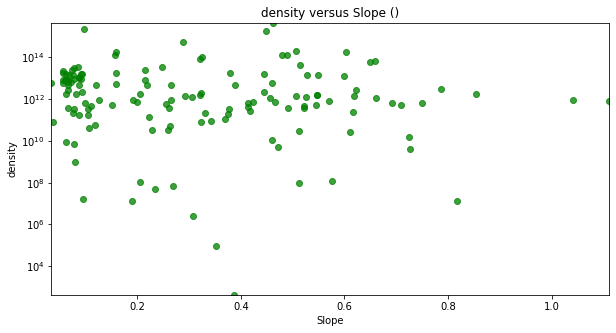

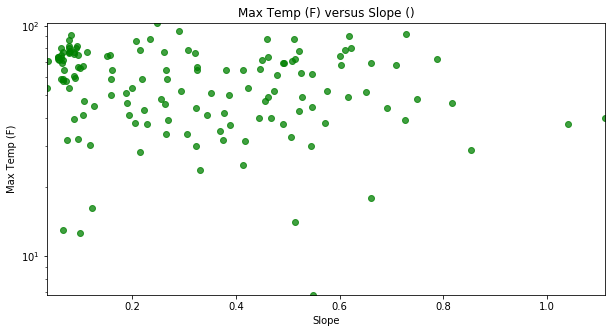

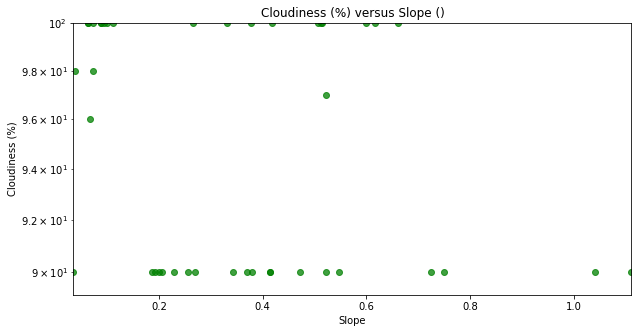

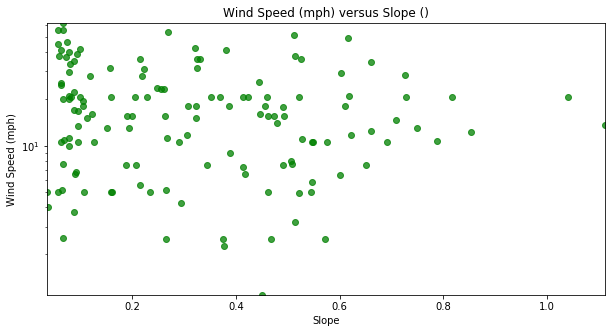

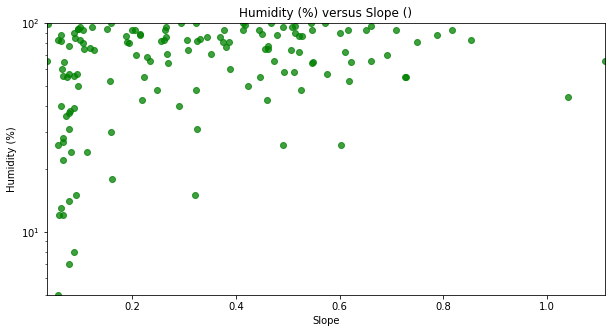

In [224]:
#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["density","Max Temp (F)","Cloudiness (%)","Wind Speed (mph)","Humidity (%)"]
for var in var_list:
    
    fig1 =plt.figure(figsize=(10, 5))
    plt.scatter(new_df["Slope"],new_df[var], marker="o", facecolors="green", edgecolors="green", alpha=0.75)
    plt.ylabel(var)
    plt.xlabel("Slope")
    plt.yscale('log')
    plt.ylim(min(new_df[var]), max(new_df[var]))
    plt.xlim(min(new_df["Slope"]), max(new_df["Slope"]))
    plt.title(f"{var} versus Slope ()")
    
    fig1.savefig(f"{var}")
    

In [241]:

new_df

,LOC_id,Slope,density,Max Temp (F),Cloudiness (%),Wind Speed (mph),Humidity (%),density_gp,temp_gp
0,1,0.215378,2.335006e+13,28.31,0,5.614719,89,H Density,L Temp
1,3,0.325050,9.957189e+13,64.31,0,31.585593,31,H Density,M Temp
2,6,0.479351,1.250451e+14,61.43,0,13.869028,88,H Density,M Temp
3,7,0.343353,8.628249e+10,41.00,90,7.516118,86,M Density,L Temp
4,10,0.092174,8.929587e+12,82.00,1,38.520107,57,H Density,H Temp
...,...,...,...,...,...,...,...,...,...
135,245,0.725036,1.499303e+10,39.20,90,28.520985,55,L Density,L Temp
136,247,0.512000,9.964306e+07,87.80,20,51.539098,58,L Density,H Temp
137,248,0.259875,3.275726e+10,77.00,40,23.018113,83,L Density,H Temp
138,250,0.660489,1.084822e+12,17.87,100,12.370278,97,M Density,L Temp


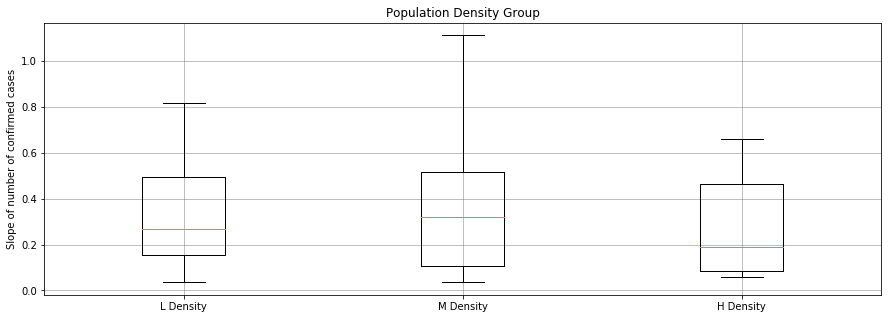

In [253]:
dent_gp=[]

for x in ['L Density','M Density','H Density']:
     dent_gp.append(new_df.loc[new_df["density_gp"]==x]["Slope"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Population Density Group')
ax1.set_ylabel('Slope of number of confirmed cases')
ax1.set_xticklabels(['L Density','M Density','H Density'])
#plt.yscale('log')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(dent_gp,flierprops=red_diamond)
plt.show()
fig1.savefig(f"slope_3Dents")


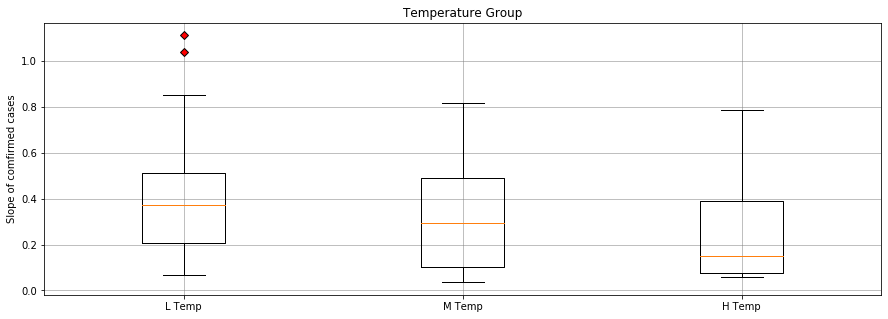

In [255]:
Te_gp=[]

for x in ['L Temp','M Temp','H Temp']:
     Te_gp.append(new_df.loc[new_df["temp_gp"]==x]["Slope"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Temperature Group')
ax1.set_ylabel('Slope of comfirmed cases')
ax1.set_xticklabels(['L Temp','M Temp','H Temp'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(Te_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"slope_3temps")


In [237]:
gp1=new_df[new_df["density_gp"]=="L Density"]["Slope"]
gp2=new_df[new_df["density_gp"]=="M Density"]["Slope"]
gp3=new_df[new_df["density_gp"]=="H Density"]["Slope"]
#######one way anova test
st.f_oneway(gp1,gp2,gp3)


KruskalResult(statistic=2.472980847818178, pvalue=0.2904016181488553)

In [238]:
#####non-parametric test
st.kruskal(gp1,gp2,gp3)

KruskalResult(statistic=2.472980847818178, pvalue=0.2904016181488553)

In [245]:
gp1=new_df[new_df["temp_gp"]=="L Temp"]["Slope"]
gp2=new_df[new_df["temp_gp"]=="M Temp"]["Slope"]
gp3=new_df[new_df["temp_gp"]=="H Temp"]["Slope"]
#######one way anova test
st.f_oneway(gp1,gp2,gp3)



F_onewayResult(statistic=3.4888665064247744, pvalue=0.033275812388761976)

In [246]:
st.kruskal(gp1,gp2,gp3)

KruskalResult(statistic=7.584335849365516, pvalue=0.022546669348302184)